In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
%pip install sdv
%pip install urllib3==1.26.7


Note: you may need to restart the kernel to use updated packages.


In [10]:
dataset=pd.read_csv('C:/Users/SHUBHAM/Downloads/diabetes_data.csv')

dataframe=pd.DataFrame(dataset)

dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=dataframe)

metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "Pregnancies": {
            "sdtype": "numerical"
        },
        "Glucose": {
            "sdtype": "numerical"
        },
        "BloodPressure": {
            "sdtype": "numerical"
        },
        "SkinThickness": {
            "sdtype": "numerical"
        },
        "Insulin": {
            "sdtype": "numerical"
        },
        "BMI": {
            "sdtype": "numerical"
        },
        "DiabetesPedigreeFunction": {
            "sdtype": "numerical"
        },
        "Age": {
            "sdtype": "numerical"
        },
        "Outcome": {
            "sdtype": "numerical"
        }
    }
}

In [12]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

In [13]:
synthesizer.fit(
    data=dataframe
)

In [14]:
synthetic_data = synthesizer.sample(
    num_rows=500
)

synthetic_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19,10,38.387409,0.561331,40,1
1,0,151,44,6,105,26.125923,0.463959,27,1
2,3,169,57,24,240,33.224573,0.541364,36,0
3,4,86,61,35,0,32.918264,0.526311,39,0
4,6,75,62,31,77,37.453830,0.178734,21,0
...,...,...,...,...,...,...,...,...,...
495,0,101,87,46,297,38.732291,0.421418,21,0
496,4,124,72,28,27,33.576185,0.630074,50,0
497,4,181,35,38,249,35.137482,0.434926,35,1
498,4,152,81,49,165,36.694959,0.820895,45,1


In [15]:
synthetic_data.to_csv('C:/Users/SHUBHAM/Desktop/syn_data.csv') # to save csv file

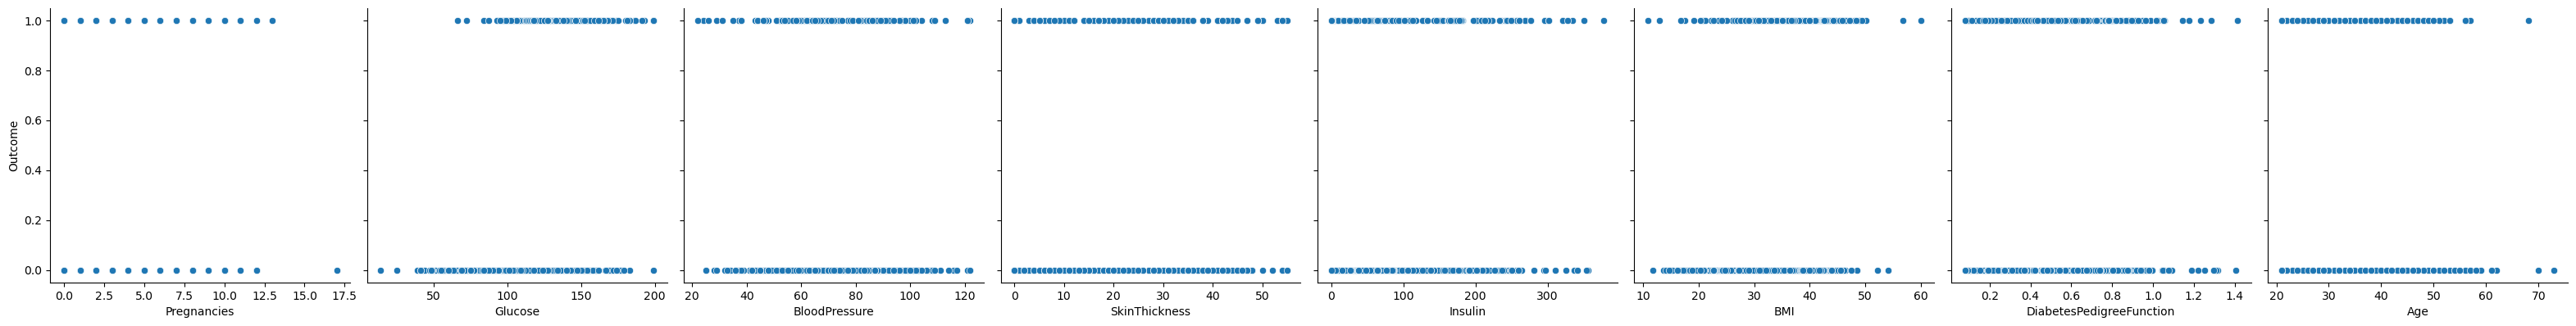

In [16]:
sns.pairplot(synthetic_data, x_vars=['Pregnancies', 'Glucose', 'BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'], y_vars='Outcome', height=4, aspect=1, kind='scatter')
plt.show()

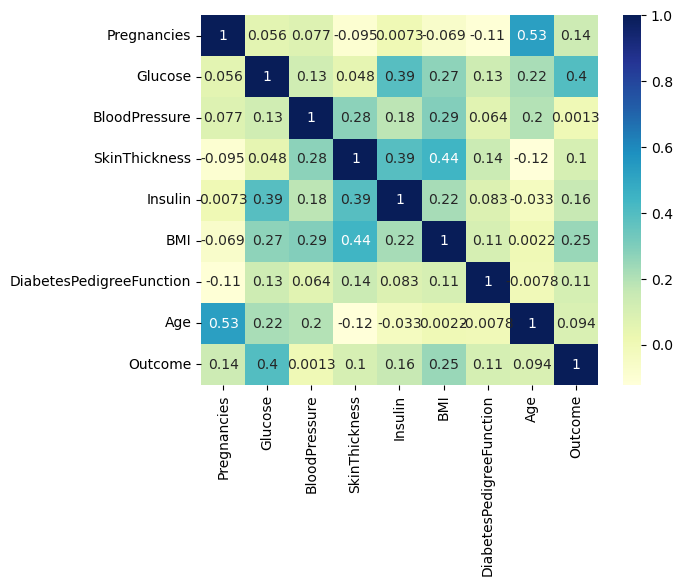

In [17]:
sns.heatmap(synthetic_data.corr(), cmap="YlGnBu", annot = True)
plt.show()